# Pfizer & BioNTech's Covid19 vaccine efficiency 

* Author: C. Gauchy

Considering $p_c$ and $p_v$ respectively the probability that a subject from the control and the vaccine group to fell ill of Covid-19. The vaccine efficiency $\nu$ writes:
$$
\nu = 1 - \frac{p_v}{p_c} \ ,
$$
Pfizer perform a Bayesian analysis on the probability that a Covid+ subject is from the vaccinated group:
$$
\theta = \frac{p_v}{p_c + p_v} = \frac{1 - \nu}{2 - \nu} \ ,
$$
the prior distribution $\pi$ on $\theta$ is a Beta distribution $\text{Beta}(\alpha=0.700102, \beta=1)$. Let's have a look at it.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from matplotlib import rc
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'size': 20})

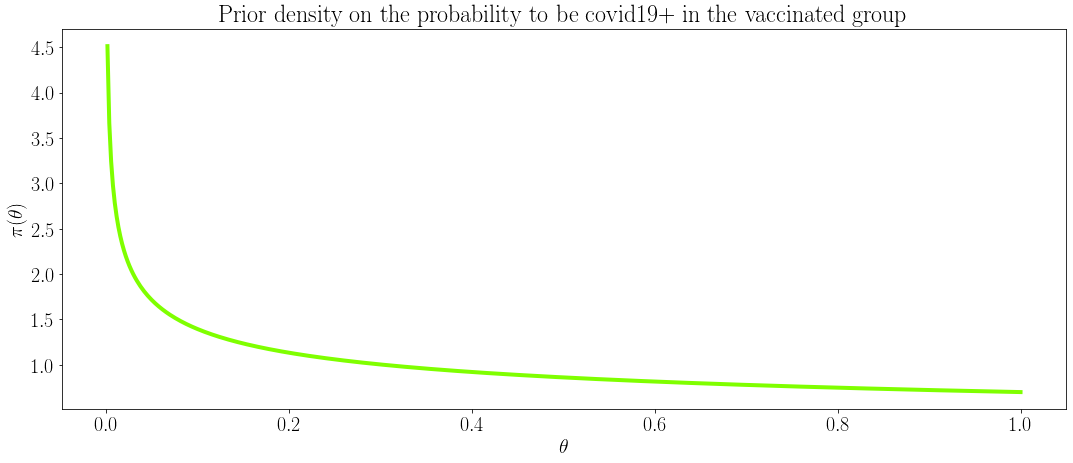

In [60]:
alpha, beta = 0.700102, 1
grid_theta = np.linspace(0, 1, 500)
plt.figure(figsize=(18, 7))
plt.plot(grid_theta, sps.beta.pdf(grid_theta, alpha, beta), '-', color='chartreuse', linewidth=4)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$\pi(\theta)$")
plt.title(r"Prior density on the probability to be covid19+ in the vaccinated group")
plt.show()

According to Pfizer/Biontech, this a is a rather pessimistic prior with $\mathbb{E}[\theta] = 0.4118$, corresponding to a vaccine efficiency $\nu$ of $30\%$. Uncertainty on $\theta$ is also considerable, the $95%$ confidence interval on $\theta$ is $[0.005, 0.964]$, corresponding to $\nu \in [-26.2, 0.995]$. Let's have a look now on the prior probability density of $\nu$. 

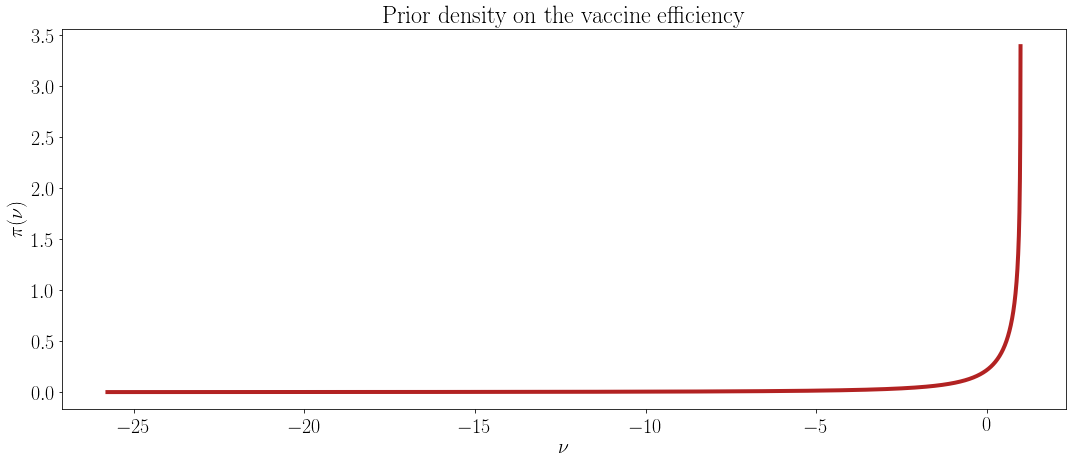

In [61]:
grid_theta = np.linspace(0.005, 0.964, 500)
grid_nu = (np.full(500, 1) - (grid_theta / (np.full(500, 1) - grid_theta)))
plt.figure(figsize=(18, 7))
plt.plot(grid_nu, sps.beta.pdf(grid_theta, alpha, beta)  * (np.full(500, 1) - grid_theta) ** 2, '-', color='firebrick', linewidth=4)
plt.xlabel(r"$\nu$")
plt.ylabel(r"$\pi(\nu)$")
plt.title(r"Prior density on the vaccine efficiency")
plt.show()

This prior distribution is optimistically asymmetric with high probability density values for $\nu \in [0, 1]$ but still globaly a pessimistic prior, given the huge probability mass for $\nu < 0$. 
Beta priors have the nice property of being conjugate with the Binomial distribution. Given respectivly $m_v$ and $m_c$ the number of subject that catch Covid19 in the vaccinated group and the control group. The posterior distribution writes:
$$
\pi(\theta | m_v, m_c) = \text{Beta}(\alpha + m_v, \beta + m_c) \ ,
$$
According to Pfizer, their vaccine effiency is above $90\%$ with a total number of subject $m_v + m_c = 94$. The number of infected in the vaccine groupe $m_v$ is not yet public. We can only infer that $m_v \approx 10$.
Let's plot the posterior density of $\theta$ and $\nu$.



theta posterior mean = 0.11263265263157894
95% credible interval for theta (0.05712875548997322, 0.18179020048302308)


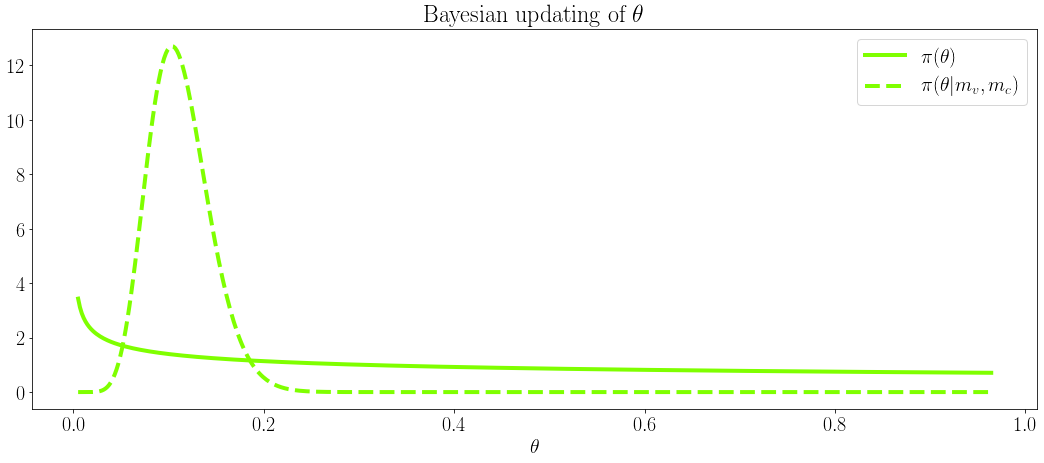

In [62]:
m_v = 10
m_c = 84

theta_posterior_mean = (alpha + m_v)/(beta + m_c + m_v)
print(f"theta posterior mean = {theta_posterior_mean}")
t1, t2 = sps.beta.interval(.95, alpha + m_v, beta + m_c)
print(f"95% credible interval for theta {t1, t2}")

plt.figure(figsize=(18, 7))
plt.plot(grid_theta, sps.beta.pdf(grid_theta, alpha, beta), '-', color='chartreuse', linewidth=4, label=r"$\pi(\theta)$")
plt.plot(grid_theta, sps.beta.pdf(grid_theta, alpha + m_v, beta + m_c), '--', color='chartreuse', linewidth=4, label=r"$\pi(\theta| m_v, m_c)$")
plt.xlabel(r"$\theta$")
plt.legend()
plt.title(r"Bayesian updating of $\theta$")
plt.show()



Given the $95\%$ credible interval for $\theta$, we will only look at efficiency posterior for $\theta \in [0.05, 0.2]$

nu posterior mean = 0.8730709970728553
95% credible interval for nu (0.777819575626763, 0.9394098018975424)


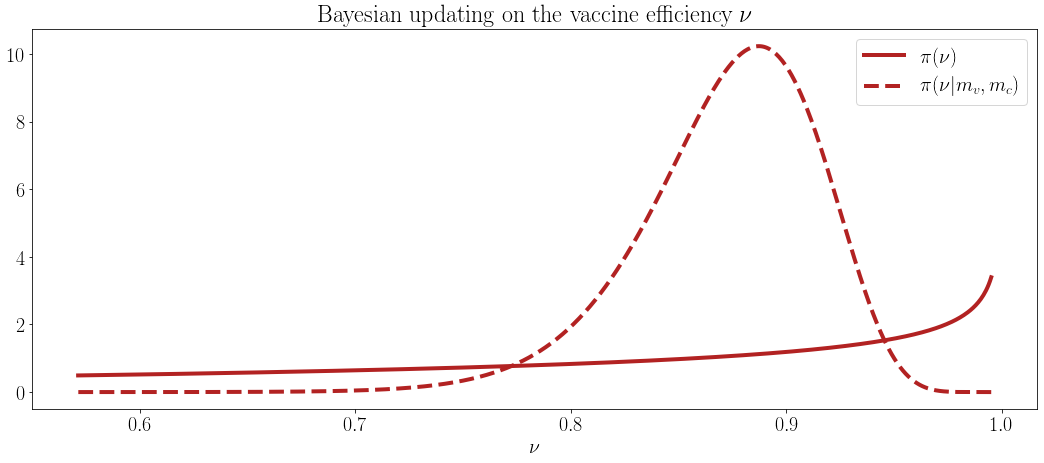

In [63]:
print(f"nu posterior mean = {(1 - theta_posterior_mean / (1 - theta_posterior_mean))}")
print(f"95% credible interval for nu {1 - t2 / (1 - t2), 1 - t1 / (1 - t1)}")

grid_theta = np.linspace(0.005, 0.3, 500)
grid_nu = (np.full(500, 1) - (grid_theta / (np.full(500, 1) - grid_theta)))

plt.figure(figsize=(18, 7))
plt.plot(grid_nu, sps.beta.pdf(grid_theta, alpha, beta)  * (np.full(500, 1) - grid_theta) ** 2, '-', color='firebrick', linewidth=4, label= r"$\pi(\nu)$")
plt.plot(grid_nu, sps.beta.pdf(grid_theta, alpha + m_v, beta + m_c)  * (np.full(500, 1) - grid_theta) ** 2, '--', color='firebrick', linewidth=4, label= r"$\pi(\nu|m_v, m_c)$")
plt.xlabel(r"$\nu$")
plt.legend()
plt.title(r"Bayesian updating on the vaccine efficiency $\nu$")
plt.show()

# Conclusion

Pfizer first results on Covid19 vaccine phase III study is encouraging, as it shows that $\nu > 78\%$ with a $97.5\%$ probability. However, because $m_v$ was not published yet by Pfizer, this is only an approximation of the true vaccine efficiency posterior.   

# References

* https://www.r-bloggers.com/2020/11/the-pfizer-biontech-vaccine-may-be-a-lot-more-effective-than-you-think/
* https://www.r-bloggers.com/2020/11/a-look-at-biontech-pfizers-bayesian-analysis-of-their-covid-19-vaccine-trial/
* https://pfe-pfizercom-d8-prod.s3.amazonaws.com/2020-09/C4591001_Clinical_Protocol.pdf